In [ ]:
! pip install wandb

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import wandb
from wandb.keras import (
    WandbMetricsLogger,
    WandbModelCheckpoint
)

In [11]:
run = wandb.init(project='Akhund_Human')

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [12]:
config = wandb.config

In [13]:
wandb_callback = [
    WandbMetricsLogger(log_freq=5),
    WandbModelCheckpoint('models')
]

In [3]:
dataset_path = '/content/drive/MyDrive/datasets/Akhund-and-Human'
width = height = 224

image_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.1
)

train_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='training',
    shuffle=True,
    batch_size=32
)

validation_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='validation',
    shuffle=False,
    batch_size=32
)


Found 421 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [4]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(width, height, 3),
    pooling='avg'
)

9406464/9406464 [==============================] - 0s 0us/step


In [5]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [6]:
model = Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

In [7]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [14]:
history = model.fit(train_data,
          validation_data=validation_data,
          epochs=32,
          callbacks=wandb_callback
          )

Epoch 1/32
14/14 [==============================] - ETA: 0s - loss: 0.3777 - accuracy: 0.8361

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 99s 7s/step - loss: 0.3777 - accuracy: 0.8361 - val_loss: 0.5498 - val_accuracy: 0.8000
Epoch 2/32
14/14 [==============================] - ETA: 0s - loss: 0.2056 - accuracy: 0.9287

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.2056 - accuracy: 0.9287 - val_loss: 0.5309 - val_accuracy: 0.8222
Epoch 3/32
14/14 [==============================] - ETA: 0s - loss: 0.1442 - accuracy: 0.9620

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.1442 - accuracy: 0.9620 - val_loss: 0.5518 - val_accuracy: 0.8222
Epoch 4/32
14/14 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9739

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0996 - accuracy: 0.9739 - val_loss: 0.6122 - val_accuracy: 0.8222
Epoch 5/32
14/14 [==============================] - ETA: 0s - loss: 0.0682 - accuracy: 0.9834

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0682 - accuracy: 0.9834 - val_loss: 0.6554 - val_accuracy: 0.8222
Epoch 6/32
14/14 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 49s 4s/step - loss: 0.0444 - accuracy: 0.9976 - val_loss: 0.7137 - val_accuracy: 0.8222
Epoch 7/32
14/14 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9929

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 50s 4s/step - loss: 0.0503 - accuracy: 0.9929 - val_loss: 0.7007 - val_accuracy: 0.8444
Epoch 8/32
14/14 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9929

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.0417 - accuracy: 0.9929 - val_loss: 0.7094 - val_accuracy: 0.8222
Epoch 9/32
14/14 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.7241 - val_accuracy: 0.8444
Epoch 10/32
14/14 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 4s/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 0.7066 - val_accuracy: 0.8444
Epoch 11/32
14/14 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.7431 - val_accuracy: 0.8444
Epoch 12/32
14/14 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9952

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0255 - accuracy: 0.9952 - val_loss: 0.8044 - val_accuracy: 0.8444
Epoch 13/32
14/14 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.7194 - val_accuracy: 0.8667
Epoch 14/32
14/14 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.8131 - val_accuracy: 0.8444
Epoch 15/32
14/14 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 44s 3s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.8667
Epoch 16/32
14/14 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 44s 3s/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.7305 - val_accuracy: 0.8444
Epoch 17/32
14/14 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 45s 3s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.7706 - val_accuracy: 0.8667
Epoch 18/32
14/14 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9929

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 44s 3s/step - loss: 0.0154 - accuracy: 0.9929 - val_loss: 0.7077 - val_accuracy: 0.8667
Epoch 19/32
14/14 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 52s 4s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.7193 - val_accuracy: 0.8667
Epoch 20/32
14/14 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 48s 3s/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.7179 - val_accuracy: 0.8667
Epoch 21/32
14/14 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 46s 3s/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.7988 - val_accuracy: 0.8667
Epoch 22/32
14/14 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 45s 3s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.7675 - val_accuracy: 0.8667
Epoch 23/32
14/14 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.9288 - val_accuracy: 0.8667
Epoch 24/32
14/14 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 3s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.7197 - val_accuracy: 0.8667
Epoch 25/32
14/14 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 45s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.8043 - val_accuracy: 0.8667
Epoch 26/32
14/14 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 49s 3s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.8188 - val_accuracy: 0.8667
Epoch 27/32
14/14 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9905

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 46s 3s/step - loss: 0.0215 - accuracy: 0.9905 - val_loss: 0.7805 - val_accuracy: 0.8667
Epoch 28/32
14/14 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 46s 3s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.7453 - val_accuracy: 0.8667
Epoch 29/32
14/14 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9952

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 46s 3s/step - loss: 0.0112 - accuracy: 0.9952 - val_loss: 0.6493 - val_accuracy: 0.8889
Epoch 30/32
14/14 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 45s 3s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.7066 - val_accuracy: 0.8667
Epoch 31/32
14/14 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 47s 4s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.7079 - val_accuracy: 0.8667
Epoch 32/32
14/14 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


14/14 [==============================] - 46s 3s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.7147 - val_accuracy: 0.8667


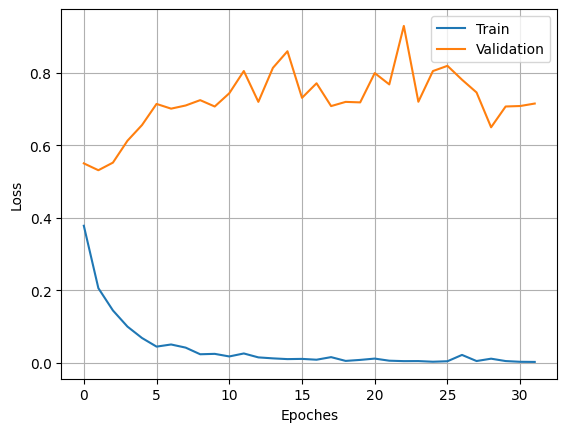

In [15]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

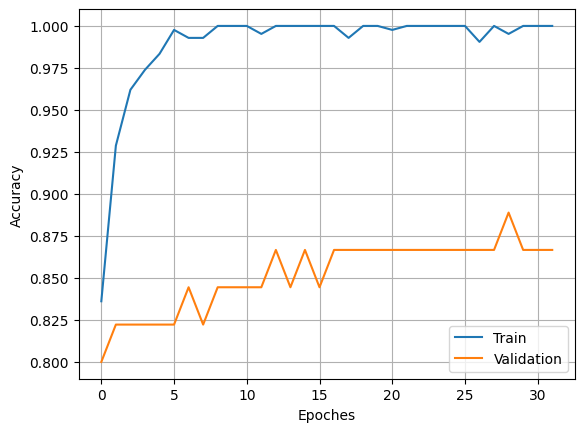

In [16]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [17]:
model.save('/content/drive/MyDrive/PyLearn 7 Course/54.TransferLearning/Akhund_detector_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
Y_pred = []
Y_vall = []

for i in range(len(validation_data)):
  for label in model.predict(validation_data[i][0]):
    Y_pred.append(np.argmax(label))
  for label in validation_data[i][1]:
    Y_vall.append(np.argmax(label))

Y_pred = np.array(Y_pred)
Y_vall = np.array(Y_vall)

1/1 [==============================] - 1s 1s/step


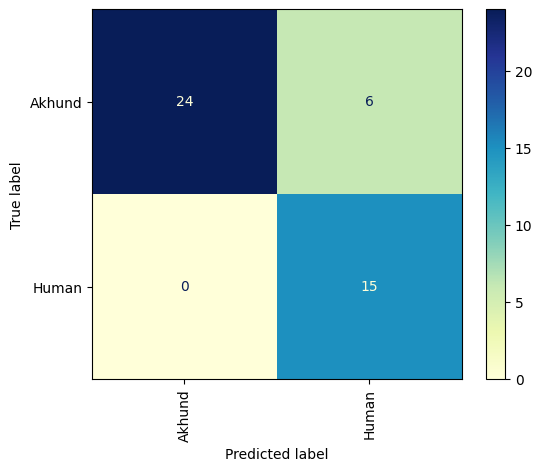

In [19]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_vall)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=validation_data.class_indices)

cm_display.plot(cmap='YlGnBu', xticks_rotation=90)
plt.show()